In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GJrcIJe8ICel6yvjeBm2")
project = rf.workspace("platerecognition-7gchs").project("experiment-plates")
version = project.version(1)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to experiment-plates-1 in yolov8:: 100%|██████████| 5292/5292 [00:00<00:00, 7788.82it/s]


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.5/783.5 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 75.9MB/s]
Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 476k/476k [00:00<00:00, 10.6MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 284.2ms
Speed: 17.4ms preprocess, 284.2ms inference, 30.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [1]:
%cd content/experiment-plates-1

C:\Users\2411c\Downloads\final - Copy\content\experiment-plates-1


C:\Users\2411c\anaconda3\envs\mini\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=320 plots=True

'yolo' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import torch

In [6]:

from ultralytics import YOLO
import torch_directml

# Check if DirectML is available and set the device
device = torch_directml.device()
print(torch_directml.device_count())
print(f"Using device: {device}")

# Load a model
# torch.to('dml')
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model.to(device)

# Use the model
model.train(data="data.yaml", epochs=3)  # train the model
metrics = model.val(data='data.yaml')  # evaluate model performance on the validation set
results = model('content/experiment-plates-1/test/images')  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

2
Using device: privateuseone:0
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=privateuseone:0, workers=8, project=None, name=train17, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False

RuntimeError: Cannot set version_counter for inference tensor

In [ ]:
Image(filename='/content/experiment-plates-1/runs/detect/train/train_batch0.jpg',width=600)

NameError: name 'Image' is not defined

In [ ]:
import matplotlib.pyplot as plt
import cv2

TypeError: Image data of dtype <U63 cannot be converted to float

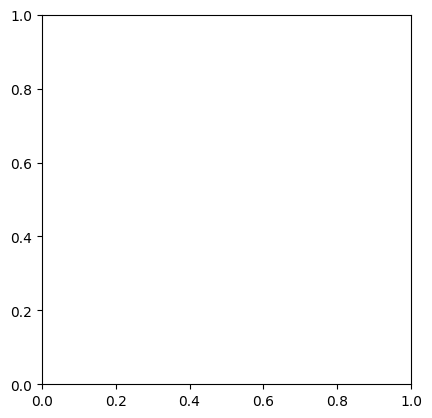

In [ ]:
plt.imshow(cv2.cvtColor('/content/experiment-plates-1/runs/detect/train/train_batch0.jpg',))

In [ ]:
!yolo task=detect mode=val model=/content/experiment-plates-1/runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/experiment-plates-1/valid/labels.cache... 435 images, 0 backgrounds, 0 corrupt: 100% 435/435 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/experiment-plates-1/valid/images/Image_15_png_jpg.rf.68c7e007e4c3575acb25b1c505a05625.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 384, len(boxes) = 475. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:05<00:00,  5.52it/s]
                   all        435        475      0.956      0.873      0.918       0.71
Speed: 0.1ms preprocess, 3.6ms inference, 0.0ms loss, 2.9ms postproce

In [ ]:
!yolo task=detect mode=predict model=/content/experiment-plates-1/runs/detect/train/weights/best.pt conf=0.25 source=/content/experiment-plates-1/test/images

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/432 /content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.b7a7774c5a25ba924e4095007226ad1b.jpg: 320x320 2 Plates, 11.3ms
image 2/432 /content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg: 320x320 2 Plates, 8.7ms
image 3/432 /content/experiment-plates-1/test/images/00f30ef5-1e8a-4a89-ac87-b9a5905582ec_jpg.rf.8637cbe090700c9510b9de040e7d6814.jpg: 320x320 1 Plate, 8.7ms
image 4/432 /content/experiment-plates-1/test/images/011d8b71-8bb9-4c8e-8b10-89952740b973_jpg.rf.06777b5d38e56d6bbcdf3ed3b3d778c9.jpg: 320x320 1 Plate, 8.2ms
image 5/432 /content/experiment-plates-1/test/images/011d8b71-8bb9-4c8e-8b10-89952740b973_jpg.rf.4eb1ada631277ff5d436bb82efe21ef1.jpg: 320x320 1 Plate, 8.3ms
image 6/432 /content/experiment-plates

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco8.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format

In [ ]:
model=YOLO('/content/experiment-plates-1/runs/detect/train/weights/best.pt')
results=model('/content/experiment-plates-1/test/images')



image 1/432 /content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.b7a7774c5a25ba924e4095007226ad1b.jpg: 320x320 2 Plates, 11.0ms
image 2/432 /content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg: 320x320 2 Plates, 8.2ms
image 3/432 /content/experiment-plates-1/test/images/00f30ef5-1e8a-4a89-ac87-b9a5905582ec_jpg.rf.8637cbe090700c9510b9de040e7d6814.jpg: 320x320 1 Plate, 8.5ms
image 4/432 /content/experiment-plates-1/test/images/011d8b71-8bb9-4c8e-8b10-89952740b973_jpg.rf.06777b5d38e56d6bbcdf3ed3b3d778c9.jpg: 320x320 1 Plate, 9.1ms
image 5/432 /content/experiment-plates-1/test/images/011d8b71-8bb9-4c8e-8b10-89952740b973_jpg.rf.4eb1ada631277ff5d436bb82efe21ef1.jpg: 320x320 1 Plate, 8.4ms
image 6/432 /content/experiment-plates-1/test/images/01d7623e-50ea-4903-8c12-27200f246ac4_jpg.rf.e67bdd0c6b1a816dafb019caea84f6e4.jpg: 320x320 1 Plate, 9.3ms
image 7/432 /content/experiment-plates-1/test/im

ValueError: Invalid export format='onxx'. Valid formats are ('torchscript', 'onnx', 'openvino', 'engine', 'coreml', 'saved_model', 'pb', 'tflite', 'edgetpu', 'tfjs', 'paddle', 'ncnn')

In [ ]:
#Invalid export format='onxx'. Valid formats are ('torchscript', 'onnx',
#'openvino', 'engine', 'coreml', 'saved_model', 'pb', 'tflite', 'edgetpu', 'tfjs', 'paddle', 'ncnn')

path=model.export(format='onnx')

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from '/content/experiment-plates-1/runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 5, 2100) (21.4 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 86.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.6s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 11.9s, saved as '/content/experiment-plates-1/runs/detect/train/weights/best.onnx' (42.5 MB)

Export complete (14.0s)
Results saved to /content/experiment-plates-1/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/experiment-plates-1/runs/detect/train/weights/best.onnx imgsz=320  
Validate:        yolo va

In [ ]:
path

'/content/experiment-plates-1/runs/detect/train/weights/best.onnx'

In [ ]:
!du -h /content/detect.zip

98M	/content/detect.zip


In [ ]:
!zip -r final.zip /content/experiment-plates-1

Streaming output truncated to the last 5000 lines.
updating: content/experiment-plates-1/train/labels/aiftcg78bhla1_jpg.rf.b2ccda4a1a07bbc5ee5e33481f482eb0.txt (deflated 52%)
updating: content/experiment-plates-1/train/labels/33056_jpg.rf.a0615e37e97ddfe9eeff581d7d09615e.txt (deflated 62%)
updating: content/experiment-plates-1/train/labels/t13qv1otxpea1_jpg.rf.4ca64b05e70bb80698042a8792c8b1d2.txt (deflated 56%)
updating: content/experiment-plates-1/train/labels/c9afcyqbvroa1_jpg.rf.378cd4b78c09470485dd6e689861ec87.txt (deflated 60%)
updating: content/experiment-plates-1/train/labels/04558db6-ecee-44e6-9831-141f58b97f04_jpg.rf.88a5720dcbc038a2cebd9ec7044cbf16.txt (deflated 71%)
updating: content/experiment-plates-1/train/labels/u0f044lfh5da1_jpg.rf.6f1b3131277ed09d18269c178659f9a7.txt (deflated 59%)
updating: content/experiment-plates-1/train/labels/xyiyazotn9ga1_jpg.rf.f35de06a0f75c3e6b03c344b7d8d94be.txt (deflated 57%)
updating: content/experiment-plates-1/train/labels/d3de1c42196d3b3

In [ ]:
!zip -r /content/detect.zip /content/experiment-plates-1/runs/detect

  adding: content/experiment-plates-1/runs/detect/ (stored 0%)
  adding: content/experiment-plates-1/runs/detect/predict2/ (stored 0%)
  adding: content/experiment-plates-1/runs/detect/predict2/N1.jpeg (deflated 1%)
  adding: content/experiment-plates-1/runs/detect/predict2/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg (deflated 8%)
  adding: content/experiment-plates-1/runs/detect/predict2/Datacluster_number_plates (89).jpg (deflated 0%)
  adding: content/experiment-plates-1/runs/detect/train/ (stored 0%)
  adding: content/experiment-plates-1/runs/detect/train/train_batch2.jpg (deflated 2%)
  adding: content/experiment-plates-1/runs/detect/train/val_batch1_pred.jpg (deflated 11%)
  adding: content/experiment-plates-1/runs/detect/train/val_batch1_labels.jpg (deflated 12%)
  adding: content/experiment-plates-1/runs/detect/train/R_curve.png (deflated 18%)
  adding: content/experiment-plates-1/runs/detect/train/train_batch1665.jpg (deflated 5%)
  adding:

In [ ]:
pwd

'/content/experiment-plates-1'

In [ ]:
!cp /content/experiment-plates-1/final.zip /content/drive/MyDrive/yolo_2/

In [ ]:
!cp -r /content/experiment-plates-1 /content/drive/MyDrive/yolo_2/experiment-plates-1

In [ ]:
! cp -r /content/detect.zip /content/drive/MyDrive/yolo_2/

In [ ]:
!unzip /content/drive/MyDrive/yolo_2/detect.zip -d /content/drive/MyDrive/yolo_2/detect_folder

Archive:  /content/drive/MyDrive/yolo_2/detect.zip
   creating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/
   creating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/predict2/
  inflating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/predict2/N1.jpeg  
  inflating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/predict2/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg  
  inflating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/predict2/Datacluster_number_plates (89).jpg  
   creating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/train/
  inflating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/train/train_batch2.jpg  
  inflating: /content/drive/MyDrive/yolo_2/detect/content/experiment-plates-1/runs/detect/train/val_batch1_pred.jpg  
 

In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [ ]:
a=model.predict('/content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.b7a7774c5a25ba924e4095007226ad1b.jpg')


image 1/1 /content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.b7a7774c5a25ba924e4095007226ad1b.jpg: 320x320 2 Plates, 26.6ms
Speed: 1.7ms preprocess, 26.6ms inference, 6.9ms postprocess per image at shape (1, 3, 320, 320)


In [ ]:
a

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Plate'}
 obb: None
 orig_img: array([[[ 68,  65,  61],
         [ 95,  92,  88],
         [110, 107, 103],
         ...,
         [180, 172, 155],
         [174, 166, 149],
         [172, 164, 147]],
 
        [[ 65,  62,  58],
         [ 67,  64,  60],
         [ 45,  42,  38],
         ...,
         [156, 148, 131],
         [168, 160, 143],
         [204, 196, 179]],
 
        [[111, 108, 104],
         [116, 113, 109],
         [ 70,  67,  63],
         ...,
         [157, 149, 132],
         [157, 149, 132],
         [211, 203, 186]],
 
        ...,
 
        [[ 53,  53,  39],
         [ 37,  37,  23],
         [ 52,  52,  38],
         ...,
         [186, 191, 190],
         [165, 170, 169],
         [187, 192, 191]],
 
        [[ 35,  37,  25],
         [ 51,  53,  41],
         [ 36,  38,  26],
         ...,
         [199, 204,

In [ ]:
net = cv2.dnn.readNetFromONNX('/content/experiment-plates-1/runs/detect/train/weights/best.onnx')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [ ]:
pip install pytesseract

In [ ]:
import numpy as np
import pytesseract as pt
INPUT_WIDTH=320
INPUT_HEIGHT=320

In [ ]:
def get_detections(img,net):
    # 1.CONVERT IMAGE TO YOLO FORMAT
    image = img.copy()
    row, col, d = image.shape

    max_rc = max(row,col)
    input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
    input_image[0:row,0:col] = image

    # 2. GET PREDICTION FROM YOLO MODEL
    blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WIDTH,INPUT_HEIGHT),swapRB=True,crop=False)
    net.setInput(blob)
    preds = net.forward()
    detections = preds[0]

    return input_image, detections

def non_maximum_supression(input_image,detections):

    # 3. FILTER DETECTIONS BASED ON CONFIDENCE AND PROBABILIY SCORE

    # center x, center y, w , h, conf, proba
    boxes = []
    confidences = []

    image_w, image_h = input_image.shape[:2]
    x_factor = image_w/INPUT_WIDTH
    y_factor = image_h/INPUT_HEIGHT

    for i in range(len(detections)):
        row = detections[i]
        confidence = row[4] # confidence of detecting license plate
        if confidence > 0.4:
            class_score = row[5] # probability score of license plate
            if class_score > 0.25:
                cx, cy , w, h = row[0:4]

                left = int((cx - 0.5*w)*x_factor)
                top = int((cy-0.5*h)*y_factor)
                width = int(w*x_factor)
                height = int(h*y_factor)
                box = np.array([left,top,width,height])

                confidences.append(confidence)
                boxes.append(box)

    # 4.1 CLEAN
    boxes_np = np.array(boxes).tolist()
    confidences_np = np.array(confidences).tolist()

    # 4.2 NMS
    index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45)

    return boxes_np, confidences_np, index

def drawings(image,boxes_np,confidences_np,index):
    # 5. Drawings
    for ind in index:
        x,y,w,h =  boxes_np[ind]
        bb_conf = confidences_np[ind]
        conf_text = 'plate: {:.0f}%'.format(bb_conf*100)
        license_text = extract_text(image,boxes_np[ind])


        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,255),2)
        cv2.rectangle(image,(x,y-30),(x+w,y),(255,0,255),-1)
        cv2.rectangle(image,(x,y+h),(x+w,y+h+25),(0,0,0),-1)


        cv2.putText(image,conf_text,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),1)
        cv2.putText(image,license_text,(x,y+h+27),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),1)

    return image

In [ ]:
# extrating text
def extract_text(image,bbox):
    x,y,w,h = bbox
    roi = image[y:y+h, x:x+w]

    if 0 in roi.shape:
        return 'no number'

    else:
        text = pt.image_to_string(roi)
        text = text.strip()

        return text

In [ ]:
# predictions flow with return result
def yolo_predictions(img,net):
    # step-1: detections
    input_image, detections = get_detections(img,net)
    # step-2: NMS
    boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)
    # step-3: Drawings
    result_img = drawings(img,boxes_np,confidences_np,index)
    return result_img

In [ ]:
/content/experiment-plates-1/runs/detect/predict/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg

In [ ]:
img = cv2.imread('/content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg')

In [ ]:
results=yolo_predictions(img,net)

In [ ]:
  # step-1: detections
input_image, detections = get_detections(img,net)
    # step-2: NMS
boxes_np, confidences_np, index = non_maximum_supression(input_image, detections)

In [ ]:
boxes_np

[[5, -3, 13, 31], [10, 12, 8, 3], [11, -7, 27, 64], [20, 25, 16, 7]]

array([[[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [177, 170, 150],
        [169, 162, 142],
        [164, 157, 137]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [161, 154, 134],
        [179, 172, 152],
        [216, 209, 189]],

       [[255,   0, 255],
        [255,   0, 255],
        [255,   0, 255],
        ...,
        [153, 146, 127],
        [160, 153, 134],
        [214, 207, 188]],

       ...,

       [[ 60,  60,  48],
        [ 35,  35,  23],
        [ 53,  53,  41],
        ...,
        [185, 190, 189],
        [163, 168, 167],
        [186, 191, 190]],

       [[ 38,  39,  29],
        [ 45,  46,  36],
        [ 33,  34,  24],
        ...,
        [197, 202, 201],
        [174, 179, 178],
        [200, 205, 204]],

       [[ 36,  37,  28],
        [ 76,  77,  68],
        [ 39,  40,  31],
        ...,
        [200, 205, 204],
        [175, 180, 179],
        [204, 209, 208]]], dtype=uint8)
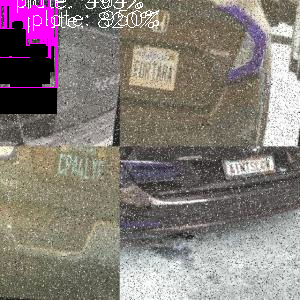

In [ ]:
results

In [ ]:
cv2.imshow(results)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
from google.colab.patches import cv2_imshow

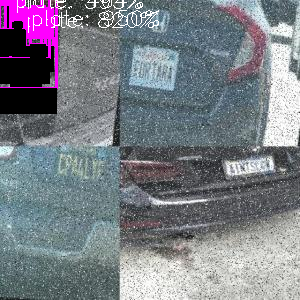

In [ ]:
cv2_imshow(results)

In [ ]:
results=model.predict('/content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg',show_boxes=True,save=True,conf=0.25)


image 1/1 /content/experiment-plates-1/test/images/00bc6c35-3eec-4fb5-bdd3-e5d8656b014f_jpg.rf.d967bb662527c35b342bd005392d1898.jpg: 320x320 2 Plates, 53.9ms
Speed: 1.5ms preprocess, 53.9ms inference, 11.2ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/predict2


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Plate'}
 obb: None
 orig_img: array([[[ 70,  67,  63],
         [ 94,  91,  87],
         [106, 103,  99],
         ...,
         [177, 170, 150],
         [169, 162, 142],
         [164, 157, 137]],
 
        [[ 72,  69,  65],
         [ 74,  71,  67],
         [ 49,  46,  42],
         ...,
         [161, 154, 134],
         [179, 172, 152],
         [216, 209, 189]],
 
        [[100,  97,  93],
         [109, 106, 102],
         [ 69,  66,  62],
         ...,
         [153, 146, 127],
         [160, 153, 134],
         [214, 207, 188]],
 
        ...,
 
        [[ 60,  60,  48],
         [ 35,  35,  23],
         [ 53,  53,  41],
         ...,
         [185, 190, 189],
         [163, 168, 167],
         [186, 191, 190]],
 
        [[ 38,  39,  29],
         [ 45,  46,  36],
         [ 33,  34,  24],
         ...,
         [197, 202,

In [ ]:
pwd

'/content/experiment-plates-1'

In [ ]:
results[0].boxes

In [ ]:
results[0].boxes.xywh.tolist()

[[252.06060791015625,
  168.54830932617188,
  58.21656799316406,
  24.224105834960938],
 [154.828369140625, 66.61026000976562, 53.895606994628906, 51.773895263671875]]

In [ ]:
img2=cv2.imread('/content/N1.jpeg')
r=yolo_predictions(img2,net)

In [ ]:
cv2_imshow(r)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
r2=model.predict('/content/N1.jpeg',show_boxes=True,save=True,conf=0.25)


image 1/1 /content/N1.jpeg: 192x320 1 Plate, 158.2ms
Speed: 1.7ms preprocess, 158.2ms inference, 2.1ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict2


In [ ]:
r3=model.predict('/content/Datacluster_number_plates (89).jpg',show_boxes=True,save=True,conf=0.25)


image 1/1 /content/Datacluster_number_plates (89).jpg: 320x256 1 Plate, 374.8ms
Speed: 1.9ms preprocess, 374.8ms inference, 8.2ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs/detect/predict2
